#Data Preparation

##Data Reading

In [1]:
from pandas import read_csv, get_dummies, DataFrame
data1= read_csv("/content/bank.csv")
data1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [2]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


##Data Encoding


In [3]:
data1["education"]=data1["education"].map({"unknown":1,"primary":2,"secondary":3,"tertiary":4})
data1["default"]=data1["default"].map({"no":0,"yes":1})
data1["housing"]=data1["housing"].map({"no":0,"yes":1})
data1["loan"]=data1["loan"].map({"no":0,"yes":1})
data1["y"]=data1["y"].map({"no":0,"yes":1})

In [4]:
data1=get_dummies(data1,columns=["marital","contact","poutcome"],dtype=int,drop_first=True)

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   education          4521 non-null   int64 
 3   default            4521 non-null   int64 
 4   balance            4521 non-null   int64 
 5   housing            4521 non-null   int64 
 6   loan               4521 non-null   int64 
 7   day                4521 non-null   int64 
 8   month              4521 non-null   object
 9   duration           4521 non-null   int64 
 10  campaign           4521 non-null   int64 
 11  pdays              4521 non-null   int64 
 12  previous           4521 non-null   int64 
 13  y                  4521 non-null   int64 
 14  marital_married    4521 non-null   int64 
 15  marital_single     4521 non-null   int64 
 16  contact_telephone  4521 non-null   int64 


##Divide Data to X and Y

In [6]:
x=data1.drop(["y"],axis=1)
y=data1["y"]
print(x.shape)
print(y.shape)

(4521, 20)
(4521,)


In [7]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.9 MB/s eta 0:00:00


In [8]:
from category_encoders import TargetEncoder
Target_Encoder1=TargetEncoder(cols=["job"]).fit(x,y)
Target_Encoder2=TargetEncoder(cols=["month"]).fit(x,y)
x=Target_Encoder1.transform(x)
x=Target_Encoder2.transform(x)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4521 non-null   int64  
 1   job                4521 non-null   float64
 2   education          4521 non-null   int64  
 3   default            4521 non-null   int64  
 4   balance            4521 non-null   int64  
 5   housing            4521 non-null   int64  
 6   loan               4521 non-null   int64  
 7   day                4521 non-null   int64  
 8   month              4521 non-null   float64
 9   duration           4521 non-null   int64  
 10  campaign           4521 non-null   int64  
 11  pdays              4521 non-null   int64  
 12  previous           4521 non-null   int64  
 13  marital_married    4521 non-null   int64  
 14  marital_single     4521 non-null   int64  
 15  contact_telephone  4521 non-null   int64  
 16  contact_unknown    4521 

In [9]:
x

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,marital_married,marital_single,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,30,0.101563,2,0,1787,0,0,19,0.461641,79,1,-1,0,1,0,0,0,0,0,1
1,33,0.091127,3,0,4789,1,1,11,0.066524,220,1,339,4,1,0,0,0,0,0,0
2,35,0.135191,4,0,1350,1,0,16,0.191126,185,1,330,1,0,1,0,0,0,0,0
3,30,0.135191,4,0,1476,1,1,3,0.103578,199,4,-1,0,1,0,0,1,0,0,1
4,59,0.072939,3,0,0,1,0,5,0.066524,226,1,-1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0.091127,3,0,-333,1,0,30,0.086402,329,5,-1,0,1,0,0,0,0,0,1
4517,57,0.109290,4,1,-3313,1,1,9,0.066524,153,1,-1,0,1,0,0,1,0,0,1
4518,57,0.108073,3,0,295,0,0,19,0.124803,151,11,-1,0,1,0,0,0,0,0,1
4519,28,0.072939,3,0,1137,0,0,6,0.171171,129,4,211,3,1,0,0,0,1,0,0


##Data Scaling (X only)

In [10]:
from sklearn.preprocessing import StandardScaler
x_scaled=StandardScaler().fit_transform(x)
DataFrame(x_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.056270,-0.345834,-1.365123,-0.130759,0.121072,-1.142051,-0.424756,0.374052,4.856276,-0.711861,-0.576829,-0.407218,-0.320413,0.785095,-0.599749,-0.267071,-0.643536,-0.213447,-0.171381,0.469300
1,-0.772583,-0.611368,-0.084417,-0.130759,1.118644,0.875617,2.354292,-0.596026,-0.666574,-0.169194,-0.576829,2.989044,2.041734,0.785095,-0.599749,-0.267071,-0.643536,-0.213447,-0.171381,-2.130831
2,-0.583458,0.509827,1.196289,-0.130759,-0.024144,0.875617,-0.424756,0.010273,1.075089,-0.303898,-0.576829,2.899143,0.270124,-1.273731,1.667363,-0.267071,-0.643536,-0.213447,-0.171381,-2.130831
3,-1.056270,0.509827,1.196289,-0.130759,0.017726,0.875617,2.354292,-1.566105,-0.148635,-0.250017,0.387967,-0.407218,-0.320413,0.785095,-0.599749,-0.267071,1.553915,-0.213447,-0.171381,0.469300
4,1.686036,-1.074168,-0.084417,-0.130759,-0.472753,0.875617,-0.424756,-1.323585,-0.666574,-0.146102,-0.576829,-0.407218,-0.320413,0.785095,-0.599749,-0.267071,1.553915,-0.213447,-0.171381,0.469300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.772583,-0.611368,-0.084417,-0.130759,-0.583410,0.875617,-0.424756,1.707910,-0.388715,0.250315,0.709566,-0.407218,-0.320413,0.785095,-0.599749,-0.267071,-0.643536,-0.213447,-0.171381,0.469300
4517,1.496912,-0.149226,1.196289,7.647669,-1.573671,0.875617,2.354292,-0.838546,-0.666574,-0.427057,-0.576829,-0.407218,-0.320413,0.785095,-0.599749,-0.267071,1.553915,-0.213447,-0.171381,0.469300
4518,1.496912,-0.180185,-0.084417,-0.130759,-0.374724,-1.142051,-0.424756,0.374052,0.148033,-0.434754,2.639160,-0.407218,-0.320413,0.785095,-0.599749,-0.267071,-0.643536,-0.213447,-0.171381,0.469300
4519,-1.245394,-1.074168,-0.084417,-0.130759,-0.094925,-1.142051,-0.424756,-1.202326,0.796162,-0.519426,0.387967,1.710451,1.451197,0.785095,-0.599749,-0.267071,-0.643536,4.685001,-0.171381,-2.130831


##Data Splitting


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.10,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4068, 20)
(453, 20)
(4068,)
(453,)


##Data Balancing (Training set only)

In [12]:
y_train.value_counts()

,count
y,
0,3601
1,467


In [13]:
from imblearn.over_sampling import SMOTE
x_train,y_train=SMOTE().fit_resample(x_train,y_train)
y_train.value_counts()

,count
y,
0,3601
1,3601


#Prediction

##Model #1

In [ ]:
data1.columns

Index(['age', 'job', 'education', 'default', 'balance', 'housing', 'loan',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'y',
       'marital_married', 'marital_single', 'contact_telephone',
       'contact_unknown', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [14]:
new1=DataFrame([{"age":19,
                 "job":"student",
                 "marital":"single",
                 "education":"secondary",
                 "default":"no",
                 "balance":500,
                 "housing":"no",
                 "loan":"no",
                 "contact":"cellular",
                 "day":28,
                 "month":"apr",
                 "duration":221,
                 "campaign":1,
                 "pdays":-1,
                 "previous":0,
                 "poutcome":"unknown"}])
new1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,19,student,single,secondary,no,500,no,no,cellular,28,apr,221,1,-1,0,unknown


In [15]:
new1["education"]=new1["education"].map({"unknown":1,"primary":2,"secondary":3,"tertiary":4})
new1["default"]=new1["default"].map({"no":0,"yes":1})
new1["housing"]=new1["housing"].map({"no":0,"yes":1})
new1["loan"]=new1["loan"].map({"no":0,"yes":1})

In [16]:
new1=get_dummies(new1,columns=["marital","contact","poutcome"],dtype=int,drop_first=True)

In [17]:
from category_encoders import TargetEncoder
# Reindex new1 to match the columns of x before applying target encoding
new1 = new1.reindex(columns= x.columns, fill_value=0)
Target_Encoder1=TargetEncoder(cols=["job"]).fit(x_train,y_train)
Target_Encoder2=TargetEncoder(cols=["month"]).fit(x_train,y_train)
new1=Target_Encoder1.transform(new1)
new1=Target_Encoder2.transform(new1)

In [18]:
#Scale the new data
new1_scaled = StandardScaler().fit(x).transform(new1)
DataFrame(new1_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-2.096455,9.792316,-0.084417,-0.130759,-0.306602,-1.142051,-0.424756,1.46539,5.392443,-0.165345,-0.576829,-0.407218,-0.320413,-1.273731,-0.599749,-0.267071,-0.643536,-0.213447,-0.171381,-2.130831


In [19]:
from statsmodels.api import add_constant
new1_scaled=add_constant(new1_scaled)
new1_scaled

array([[-2.09645472,  9.79231576, -0.08441726, -0.1307588 , -0.3066016 ,
        -1.14205138, -0.42475611,  1.4653904 ,  5.39244275, -0.16534519,
        -0.57682947, -0.4072183 , -0.32041282, -1.27373066, -0.59974932,
        -0.26707118, -0.64353574, -0.21344711, -0.1713814 , -2.1308311 ]])

##Model #2

In [ ]:
data1[12:18]

,age,job,education,default,balance,housing,loan,day,month,duration,...,pdays,previous,y,marital_married,marital_single,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
12,36,technician,4,0,1109,0,0,13,aug,328,...,-1,0,0,1,0,0,0,0,0,1
13,20,student,3,0,502,0,0,30,apr,261,...,-1,0,1,0,1,0,0,0,0,1
14,31,blue-collar,3,0,360,1,1,29,jan,89,...,241,1,0,1,0,0,0,0,0,0
15,40,management,4,0,194,0,1,29,aug,189,...,-1,0,0,1,0,0,0,0,0,1
16,56,technician,3,0,4073,0,0,27,aug,239,...,-1,0,0,1,0,0,0,0,0,1
17,37,admin.,4,0,2317,1,0,20,apr,114,...,152,2,0,0,1,0,0,0,0,0


In [20]:
new2=DataFrame([{"age":30,
                 "job":"blue-collar",
                 "marital":"married",
                 "education":"secondary",
                 "default":"no",
                 "balance":356,
                 "housing":"yes",
                 "loan":"yes",
                 "contact":"unknown",
                 "day":25,
                 "month":"feb",
                 "duration":278,
                 "campaign":1,
                 "pdays":249,
                 "previous":1,
                 "poutcome":"failure"}])
new2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,blue-collar,married,secondary,no,356,yes,yes,unknown,25,feb,278,1,249,1,failure


In [21]:
new2["education"]=new2["education"].map({"unknown":1,"primary":2,"secondary":3,"tertiary":4})
new2["default"]=new2["default"].map({"no":0,"yes":1})
new2["housing"]=new2["housing"].map({"no":0,"yes":1})
new2["loan"]=new2["loan"].map({"no":0,"yes":1})

In [22]:
new2=get_dummies(new2,columns=["marital","contact","poutcome"],dtype=int,drop_first=True)

In [23]:
from category_encoders import TargetEncoder
# Reindex new1 to match the columns of x before applying target encoding
new2 = new2.reindex(columns= x.columns, fill_value=0)
Target_Encoder1=TargetEncoder(cols=["job"]).fit(x_train,y_train)
Target_Encoder2=TargetEncoder(cols=["month"]).fit(x_train,y_train)
new2=Target_Encoder1.transform(new2)
new2=Target_Encoder2.transform(new2)

In [24]:
#Scale the new data
new2_scaled = StandardScaler().fit(x).transform(new1)
DataFrame(new2_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-2.096455,9.792316,-0.084417,-0.130759,-0.306602,-1.142051,-0.424756,1.46539,5.392443,-0.165345,-0.576829,-0.407218,-0.320413,-1.273731,-0.599749,-0.267071,-0.643536,-0.213447,-0.171381,-2.130831


In [25]:
from statsmodels.api import add_constant
new2_scaled=add_constant(new2_scaled)
new2_scaled

array([[-2.09645472,  9.79231576, -0.08441726, -0.1307588 , -0.3066016 ,
        -1.14205138, -0.42475611,  1.4653904 ,  5.39244275, -0.16534519,
        -0.57682947, -0.4072183 , -0.32041282, -1.27373066, -0.59974932,
        -0.26707118, -0.64353574, -0.21344711, -0.1713814 , -2.1308311 ]])

# 1. Logistic Regression


##Modelling

In [26]:
from sklearn.linear_model import LogisticRegression
Log_reg1=LogisticRegression() # model building
Log_reg1.fit(x_train,y_train) # training
y_pred1 = Log_reg1.predict(x_test) # Testing

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##Evaluation

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
con = confusion_matrix(y_test, y_pred1)
print('confussion matrix:\n', con)
accuracy = accuracy_score(y_test, y_pred1)
print('accuracy=', round(accuracy*100,2),'%')
rec=recall_score(y_test, y_pred1)
print('recall=', round(rec*100,2),'%')
per=precision_score(y_test, y_pred1)
print('precision=', round(per*100,2),'%')
f1=f1_score(y_test, y_pred1)
print('f1=', round(f1*100,2),'%')

confussion matrix:
 [[337  62]
 [ 17  37]]
accuracy= 82.56 %
recall= 68.52 %
precision= 37.37 %
f1= 48.37 %


##Prediction for new data

In [28]:
Log_reg1.predict(new1_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [29]:
Log_reg1.predict(new2_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

# 2. Random Forest Classifier

## Method #1

###Modelling

In [30]:
from sklearn.ensemble import RandomForestClassifier
RFC1= RandomForestClassifier(n_estimators=4, max_features="sqrt", criterion="entropy") # Model Building
RFC1.fit(x_train,y_train) # Training
y_pred1= RFC1.predict(x_test) # Testing

###Evaluation

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
con=confusion_matrix(y_test,y_pred1)
print("Confusion Matrix :\n", con)
acc=accuracy_score(y_test,y_pred1)
print("Accuracy Score=", round(acc*100,2),"%")
rec=recall_score(y_test,y_pred1)
print("Recall Score=", round(rec*100,2),"%")
pre=precision_score(y_test,y_pred1)
print("Precision Score=", round(pre*100,2),"%")
f1=f1_score(y_test,y_pred1)
print("F1 Score=",round(f1*100,2),"%")

Confusion Matrix :
 [[375  24]
 [ 41  13]]
Accuracy Score= 85.65 %
Recall Score= 24.07 %
Precision Score= 35.14 %
F1 Score= 28.57 %


##Method #2

In [32]:
from sklearn.model_selection import GridSearchCV
RFC2= RandomForestClassifier(max_features="sqrt", criterion="entropy")
estimator={"n_estimators":[1,2,3,4,5,10,30,50,100,200,500]}
GSCV=GridSearchCV(estimator=RFC2, param_grid=estimator, scoring="accuracy", cv=5) # model Building
GSCV.fit(x_scaled, y) #training testing evaluation ranking    # fitting
param=GSCV.best_params_
print(param)
acc=GSCV.best_score_
print("Accuracy =",round(acc*100,2),"%")
best_model = GSCV.best_estimator_
best_model

{'n_estimators': 500}
Accuracy = 89.94 %


RandomForestClassifier(criterion='entropy', n_estimators=500)

##Prediction for new data

In [33]:
best_model.predict(new1_scaled)

array([1])

In [34]:
best_model.predict(new2_scaled)

array([1])

# 3. Decision Tree Classifier

##Method #1

###Modelling

In [35]:
from sklearn.tree import DecisionTreeClassifier
DT_classifer1=DecisionTreeClassifier(max_depth=5, criterion='entropy') #model building
DT_classifer1.fit(x_train,y_train) # training
y_pred1 = DT_classifer1.predict(x_test) #testing

###Evaluation

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
con = confusion_matrix(y_test, y_pred1)
print('confussion matrix:\n', con)
accuracy = accuracy_score(y_test, y_pred1)
print('accuracy=', round(accuracy*100,2),'%')
rec=recall_score(y_test, y_pred1)
print('recall=', round(rec*100,2),'%')
per=precision_score(y_test, y_pred1)
print('precision=', round(per*100,2),'%')
f1=f1_score(y_test, y_pred1)
print('f1=', round(f1*100,2),'%')

confussion matrix:
 [[328  71]
 [ 20  34]]
accuracy= 79.91 %
recall= 62.96 %
precision= 32.38 %
f1= 42.77 %


## Method #2

In [37]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV
DT_classifer2=DecisionTreeClassifier( criterion='entropy')
depths={'max_depth':[3,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
grid_search1=GridSearchCV(estimator=DT_classifer2,param_grid=depths,scoring='accuracy', cv=5)# building grid search
grid_search1.fit(x_scaled,y) # training, testing , evaluation , ranking # fitting
depth=grid_search1.best_params_
print(depth)
pre=grid_search1.best_score_
print('accuracy=',round(pre*100,2),'%')
best_model = grid_search1.best_estimator_
best_model

{'max_depth': 3}
accuracy= 89.83 %


DecisionTreeClassifier(criterion='entropy', max_depth=3)

##Prediction for new data

In [38]:
best_model.predict(new1_scaled)

array([0])

In [39]:
best_model.predict(new2_scaled)

array([0])

# 4. Support Vector Classifier

## Method #1

###Modelling

In [40]:
from sklearn.svm import SVC
SV_classifier1 = SVC(kernel='poly', C=3)  # model building
SV_classifier1.fit(x_train, y_train)  # training
y_pred1 = SV_classifier1.predict(x_test) # testing

###Evaluation

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
con = confusion_matrix(y_test, y_pred1)
print('confussion matrix:\n', con)
accuracy = accuracy_score(y_test, y_pred1)
print('accuracy=', round(accuracy*100,2),'%')
rec=recall_score(y_test, y_pred1)
print('recall=', round(rec*100,2),'%')
per=precision_score(y_test, y_pred1)
print('precision=', round(per*100,2),'%')
f1=f1_score(y_test, y_pred1)
print('f1=', round(f1*100,2),'%')

confussion matrix:
 [[371  28]
 [ 34  20]]
accuracy= 86.31 %
recall= 37.04 %
precision= 41.67 %
f1= 39.22 %


##Method #2

In [42]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
SV_classifier2 = SVC()
kernel_c={'kernel':['linear','poly','rbf','sigmoid'], 'C':[1,2,5,10,100]}

grid_search1 = GridSearchCV(estimator=SV_classifier2, param_grid=kernel_c,scoring='accuracy', cv=5)                             # building
grid_search1.fit(x_scaled,y) # training , testing, evlauation , ranking     # fitting

ker_c=grid_search1.best_params_
print(ker_c)
acc=grid_search1.best_score_
print(round(acc*100,2))
best_model = GSCV.best_estimator_
best_model

{'C': 1, 'kernel': 'rbf'}
89.74


RandomForestClassifier(criterion='entropy', n_estimators=500)

##Prediction for new data

In [43]:
best_model.predict(new1_scaled)

array([1])

In [44]:
best_model.predict(new2_scaled)

array([1])

#THANK YOU!

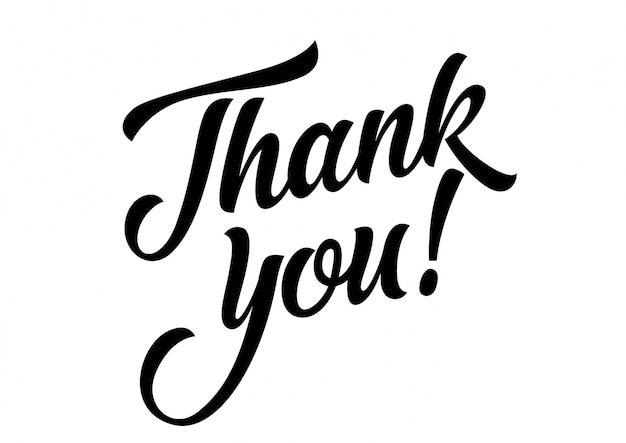

In [45]:
# This code is just for say 'THANKS' to you.
import requests
from PIL import Image
from io import BytesIO
image_url = "https://img.freepik.com/free-vector/thank-you-lettering_1262-6963.jpg"
headers= {"User-Agent": "Mozilla/5.0"}
response = requests.get(image_url,headers=headers)
img = Image.open(BytesIO(response.content))
display(img)